In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from feature_engine.encoding import MeanEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
pmt_train = pd.read_csv("train.csv")
pmt_test = pd.read_csv("test.csv")

In [3]:
pmt_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
print(pmt_train['Target'])

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64


In [5]:
output = pmt_train['Target'].values
print(output)

[4 4 4 ... 2 2 2]


In [6]:
pmt_train.dtypes

Id                  object
v2a1               float64
hacdor               int64
rooms                int64
hacapo               int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 143, dtype: object

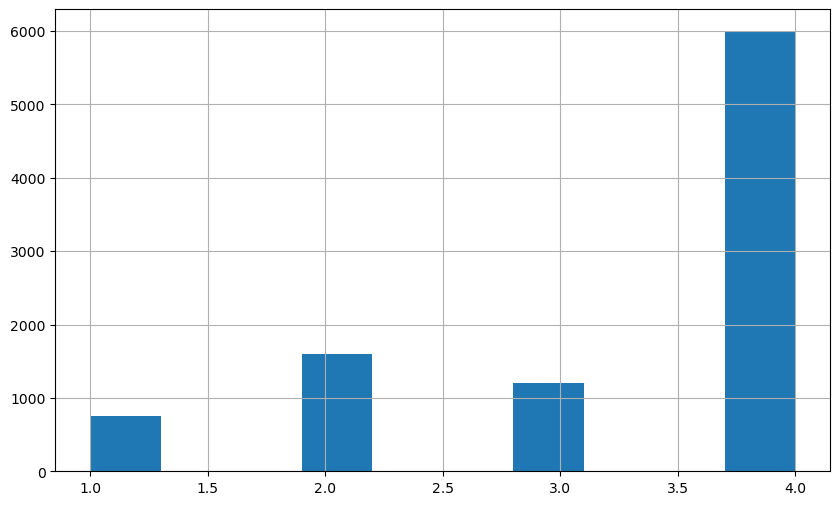

In [7]:
#checking for biases

plt.figure(figsize=(10,6))
pmt_train['Target'].hist()
plt.show()

In [8]:
#checking if whether all members of house have same poverty level

hnot_same = []
household = pmt_train[['idhogar', 'Target']]
household = household.sort_values(by= 'idhogar')
household = household.drop_duplicates()
household.head()

,idhogar,Target
7472,001ff74ca,4
8159,003123ec2,2
6472,004616164,2
6606,004983866,3
7792,005905417,2


In [9]:
hnot_same = household['idhogar'].value_counts()
for x in hnot_same.index:
    if hnot_same.loc[x] <= 1:
        hnot_same = hnot_same.drop(x)
print(hnot_same.index)     

Index(['5c6f32bbc', '8242a51ec', '4dc11e11f', '6c543442a', '309fb7246',
       '30a70901d', '54118d5d9', 'efd3aec61', '932287f5d', 'f006348ed',
       '513adb616', '50e064ee8', '0f9494d3a', '71cd52a80', '0f3e65c83',
       '4e19bd549', 'cc971b690', '6bcf799cf', '73d85d05d', '4c2dba109',
       '4b6077882', 'f7b421c2c', '09e25d616', '8bb6da3c1', 'c7ce4e30c',
       '8ae3e74ca', 'f94589d38', '078a0b6e2', '7ad269eef', '3c6973219',
       '3c73c107f', '55a662731', '564eab113', '7c57f8237', '15a891635',
       'dfb966eec', '614b48fb7', 'a20ff33ba', 'e17b252ed', '636330516',
       '5e9329fc6', 'e235a4eec', 'daafc1281', '654ef7612', '26b3a0f41',
       'd9b1558b5', '5c3f7725d', '288579c97', '28893b5e7', 'e65d4b943',
       'a94a45642', '67ad49822', '6833ac5dc', '594d3eb27', '18832b840',
       '9bbf7c6ca', '17fb04a62', '694a0cbf4', 'd64524b6b', '2c9872b82',
       '2cb443214', '6a389f3de', '46af47063', 'a3288e6fa', 'bd82509d1',
       'be91da044', '8420bcfca', 'c38913488', '03f4e5f4d', 'bcaa

In [10]:
#check if there are families without family head

pd.crosstab(pmt_train['edjefe'], pmt_train['edjefa'])

edjefa,10,11,12,13,14,15,16,17,18,19,...,21,3,4,5,6,7,8,9,no,yes
edjefe,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,111,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,751,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,113,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,103,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,208,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,285,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,134,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,202,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,0


In [11]:
#set poverty level

for household in hnot_same.index:
    
    correct_val = int(pmt_train[(pmt_train['idhogar'] == household) & (pmt_train['parentesco1'] == 1.0)]['Target'])
     
    pmt_train.loc[pmt_train['idhogar'] == household, 'Target'] = correct_val

check = pmt_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print(check[check != True])

Series([], Name: Target, dtype: bool)


In [12]:
#count null values in columns
nan_vals = pmt_train.isna().sum()

In [13]:
pmt_train['Target'].isna().sum()

0

In [14]:
#deal with Nan values in other columns
nan_vals = nan_vals[nan_vals > 0]
print(nan_vals)

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64


In [15]:
#fix rez_esc Nan values

for x in pmt_train.index:
    if pmt_train.loc[x, 'escolari'] == 0 and np.isnan(pmt_train.loc[x, 'rez_esc']):
        pmt_train.loc[x, 'rez_esc'] = 0

edu_list = pmt_train.dropna(subset=['rez_esc'])
education_median = edu_list.groupby('idhogar')['rez_esc'].apply(lambda x: np.median(x))
education_median = dict(education_median)
#print(education_median)

house_edu = pmt_train[['idhogar', 'rez_esc']]
house_edu = house_edu[np.isnan(house_edu['rez_esc']) == True]
house_edu = house_edu.set_index('idhogar')

for x in house_edu.index:
    try:
        median = education_median[x]
    except:
        median = 0
    pmt_train.loc[pmt_train['idhogar'] == x, 'rez_esc'] = median
    
        
pmt_train['rez_esc'].isna().sum()


0

In [16]:
#fix v18q1 Nan values

tablet_list = pmt_train[['idhogar', 'v18q', 'v18q1']]
tablet_total = tablet_list.groupby('idhogar')['v18q'].apply(lambda x: np.sum(x))
tablet_total = dict(tablet_total)
tablet_list = tablet_list[np.isnan(tablet_list['v18q1']) == True]
tablet_list = tablet_list.set_index('idhogar')

for x in tablet_list.index:
    try:
        sumt = tablet_total[x]
    except:
        sumt = 0
        
    pmt_train.loc[pmt_train['idhogar'] == x, 'v18q1'] = sumt
    
    
        
pmt_train['v18q1'].isna().sum()

0

In [17]:
#fix v2a1 values
def aver(x):
    v2_nona = pmt_train.dropna(subset=['v2a1'])
    
    urban_mean = int(np.mean(v2_nona[v2_nona['area1'] == 1]['v2a1']))
    rural_mean = int(np.mean(v2_nona[v2_nona['area2'] == 1]['v2a1']))
    
    if x == 1:
        return urban_mean
    elif x == 0:
        return rural_mean

pmt_train.loc[(pmt_train['area1'] == 1) & np.isnan(pmt_train['v2a1']), 'v2a1'] = aver(1)
pmt_train.loc[(pmt_train['area2'] == 1) & np.isnan(pmt_train['v2a1']), 'v2a1'] = aver(0)

pmt_train['v2a1'].isna().sum()

0

In [18]:
#fix meaneduc and SQBmeaned
mean_edu = pmt_train[np.isnan(pmt_train['meaneduc']) & np.isnan(pmt_train['SQBmeaned'])]
mean_edu = mean_edu[['idhogar','escolari','meaneduc', 'SQBmeaned']]
mean_na_index = mean_edu['idhogar'].values

values = {'meaneduc' : 0, 'SQBmeaned' : 0}

pmt_train = pmt_train.fillna(value=values)

In [19]:
#Further cleaning
pmt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [20]:
pmt_train.select_dtypes(np.object).head()

/var/folders/4b/_7084_nj2w5gwdmch9vv6l_w0000gn/T/ipykernel_34775/882906620.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pmt_train.select_dtypes(np.object).head()


,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [21]:
def map(x):
    if x == 'yes':
        return float(1)
    elif x == 'no':
        return float(0)
    else:
        return float(x)
    
for pmt in [pmt_train, pmt_test]:
    pmt['dependency'] = pmt['dependency'].apply(map)
    pmt['edjefe'] = pmt['edjefe'].apply(map)
    pmt['edjefa'] = pmt['edjefa'].apply(map)
    
pmt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(11), int64(130), object(2)
memory usage: 10.4+ MB


In [22]:
pmt_train = pmt_train.drop(columns = ['Id', 'idhogar'])
pmt_test = pmt_test.drop(columns = ['Id', 'idhogar'])
pmt_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,172832.0,0,8,0,1,1,0,0.0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [23]:
#Split data into traing and validation data
X = pmt_train.drop('Target', axis=1)
Y = pmt_train['Target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)


In [24]:
#Random Forrest Classifier Model
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

#Predict with X_test and Evaluate using classification report and confusion matrix
prediction = rfc.predict(X_test)
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           1       0.97      0.80      0.87       244
           2       0.96      0.84      0.89       467
           3       0.99      0.72      0.83       374
           4       0.89      0.99      0.94      1783

    accuracy                           0.92      2868
   macro avg       0.95      0.84      0.88      2868
weighted avg       0.92      0.92      0.91      2868

[[ 194    6    0   44]
 [   0  390    1   76]
 [   4    7  268   95]
 [   3    4    3 1773]]


In [25]:
#check accuracy using Random Forrest with cross validation
from sklearn.model_selection import KFold,cross_val_score